## FOR READING EDF FILES IN PYTHON

In [1]:
import mne

In [2]:
file = mne.io.read_raw_edf('2019.06.21-13.02.56.711.edf', preload=True)

Extracting EDF parameters from C:\Users\ESPORT\Documents\Mirfarids_code\2019.06.21-13.02.56.711.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6124  =      0.000 ...    48.992 secs...


In [3]:
file

<RawEDF  |  2019.06.21-13.02.56.711.edf, n_channels x n_times : 8 x 6125 (49.0 sec), ~403 kB, data loaded>

In [4]:
jsons5

NameError: name 'jsons5' is not defined

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test
from mne.viz.utils import center_cmap

In [6]:
%matplotlib inline

In [7]:
mne.set_log_level(True)

In [8]:
raw = mne.io.read_raw_edf('2019.06.21-13.02.56.711.edf', preload=True)

Extracting EDF parameters from C:\Users\ESPORT\Documents\Mirfarids_code\2019.06.21-13.02.56.711.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6124  =      0.000 ...    48.992 secs...


In [9]:
raw

<RawEDF  |  2019.06.21-13.02.56.711.edf, n_channels x n_times : 8 x 6125 (49.0 sec), ~403 kB, data loaded>

In [10]:
raw.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | O1, P3, C3, F3, F4, C4, P4, O2
    chs : list | 8 items (EEG: 8)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 62.5 Hz
    meas_date : tuple | 2019-06-21 13:02:57 GMT
    nchan : int | 8
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 125.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>

|"bads": A list of noisy (bad) channels which are ignored in further analyses. Initially, this list is empty, but we will manually populate it later.

"meas_date": A tuple containing the Unix timestamp (seconds since 1970-01-01 00:00:00) and additional microseconds of the recording date.

In [11]:
from datetime import datetime

In [12]:
datetime.utcfromtimestamp(raw.info["meas_date"][0])

datetime.datetime(2019, 6, 21, 13, 2, 57)

In [13]:
raw.info["ch_names"][:10]

['O1', 'P3', 'C3', 'F3', 'F4', 'C4', 'P4', 'O2']

# Assigning a montage

In [14]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed']

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 93 unique labels.


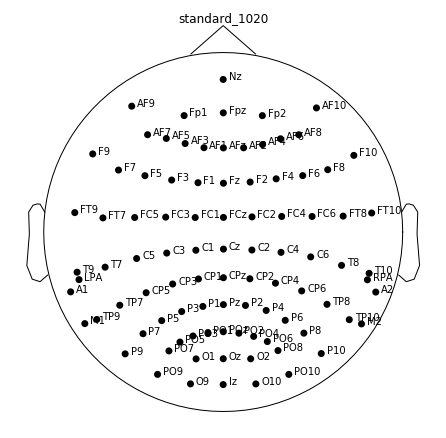

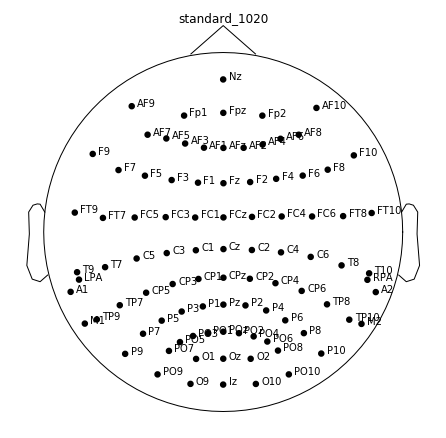

In [15]:
montage = mne.channels.read_montage("standard_1020")
montage.plot()

In [16]:
raw.set_montage(montage)

<RawEDF  |  2019.06.21-13.02.56.711.edf, n_channels x n_times : 8 x 6125 (49.0 sec), ~411 kB, data loaded>

# Re-referencing

In [17]:
raw.set_eeg_reference("average")

Applying average reference.
Applying a custom EEG reference.


<RawEDF  |  2019.06.21-13.02.56.711.edf, n_channels x n_times : 8 x 6125 (49.0 sec), ~411 kB, data loaded>

In [18]:
raw._data.shape

(8, 6125)

In [19]:
raw._data[0].shape

(6125,)

In [20]:
len(jsons5[0]['data'][0]['d'][0])

NameError: name 'jsons5' is not defined

In [187]:
jsons5[0]['data'][0]['d'][0]

[-875.3782958984375,
 -999.38525390625,
 -62.3568115234375,
 -90.66044616699219,
 -625.2256469726562,
 -994.1434936523438,
 -251.14013671875,
 -47.396820068359375,
 152.33428955078125,
 1400.0732421875,
 1222.35107421875,
 1599.6651611328125,
 1595.057373046875,
 881.4091796875,
 1901.3875732421875,
 2162.237060546875,
 2249.29931640625,
 2369.03515625,
 2163.00146484375,
 2689.04638671875,
 2687.6806640625,
 3364.39453125,
 3755.90673828125,
 3269.76708984375,
 3541.5673828125,
 3448.35546875,
 3895.81494140625,
 4169.66943359375,
 3687.5126953125,
 3961.86083984375,
 4261.65087890625,
 5211.86962890625,
 5923.5849609375,
 5865.66796875,
 6101.7060546875,
 5853.2626953125,
 6174.087890625,
 6646.068359375,
 6729.0947265625,
 7284.1298828125,
 7285.3642578125,
 7137.7138671875,
 6464.3671875,
 5242.1982421875,
 4681.919921875,
 4265.38037109375,
 4453.53564453125,
 4589.94384765625,
 4391.12548828125,
 4412.775390625,
 3606.1474609375,
 3227.19189453125,
 3584.94189453125,
 3590.783203

In [186]:
len(jsons5[0]['data'][0]['d'][0])/raw._data[0].shape[0]

5.864326530612245

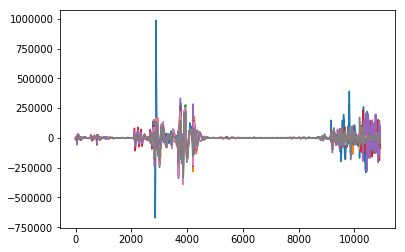

In [205]:
for i in range(8):
    plt.plot(jsons5[0]['data'][0]['d'][i][25000:])


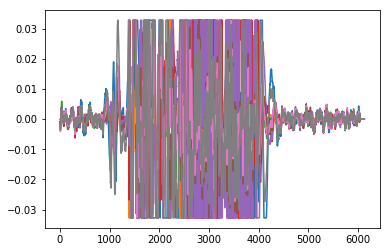

In [204]:
for i in range(8):
    plt.plot(raw._data[i])

## getting raw data

In [1]:
import requests

In [60]:
respose = requests.get("http://127.0.0.1:336/getinfo")

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=336): Max retries exceeded with url: /getinfo (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000021437052B00>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [27]:
respose.headers

{'Content-Length': '757', 'Content-Type': 'text/html', 'Access-Control-Allow-Origin': '*', 'Connection': 'Closed'}

In [28]:
s = requests.Session()

In [29]:
s.get('http://127.0.0.1:336/getdata')

<Response [200]>

In [ ]:
dictionary = 

In [221]:
s.get('http://127.0.0.1:336/getinfo', stream = True)

<Response [200]>

In [220]:
print(r.text)

NameError: name 'r' is not defined

In [69]:
r = requests.get('http://127.0.0.1:336/getdata', stream=True)

In [67]:
for line in r.iter_lines():
    print(i)
    break

7


In [74]:
r.json()

{'data': [{'d': [[230.226318359375,
     -793.503662109375,
     -1166.1846923828125,
     -788.6883544921875,
     -404.95751953125,
     -229.6021728515625,
     -148.0072021484375,
     -240.18905639648438,
     -268.6321716308594,
     -159.6549072265625,
     -136.09115600585938,
     37.207611083984375,
     378.0567626953125,
     565.63330078125,
     611.6710205078125,
     414.03546142578125,
     -24.79962158203125,
     -120.91914367675781,
     260.1562194824219,
     505.1469421386719,
     398.3858642578125,
     148.223388671875,
     -190.231689453125,
     -441.445068359375,
     -424.171630859375,
     -266.60321044921875,
     -135.84457397460938,
     -94.43586730957031,
     -53.47259521484375,
     83.01947784423828,
     93.80813598632812,
     -162.02471923828125,
     -298.43096923828125,
     -303.3349304199219,
     -777.03955078125,
     -1236.402587890625,
     -635.0411376953125,
     461.22442626953125,
     901.0723266601562,
     675.1448974609375,
   

In [75]:
r = requests.get('http://127.0.0.1:336/getdata', stream=True)

In [76]:
r.json()

{'data': [{'d': [[368.453369140625,
     828.1499633789062,
     1352.23095703125,
     1315.345947265625,
     1014.12158203125,
     769.6295166015625,
     710.02880859375,
     853.894775390625,
     1012.2705078125,
     1114.48388671875,
     1032.4989013671875,
     597.8096923828125,
     41.572265625,
     -374.93853759765625,
     -571.481689453125,
     -480.75140380859375,
     -396.77813720703125,
     -529.7845458984375,
     -412.32159423828125,
     105.792236328125,
     419.4387512207031,
     570.495849609375,
     955.760498046875,
     873.789306640625,
     199.591796875,
     -52.7618408203125,
     115.47940063476562,
     346.4638977050781,
     691.889892578125,
     804.2205810546875,
     702.1363525390625,
     622.0455322265625,
     344.044921875,
     3.164794921875,
     -322.5566711425781,
     -714.0377807617188,
     -761.1923828125,
     -629.014404296875,
     -673.8199462890625,
     -578.6634521484375,
     -541.7115478515625,
     -712.996704101

In [77]:
test = r.json()

In [80]:
import numpy as np

In [86]:
np.shape(np.array(test['data'][0]['d']))

(8, 3345)

In [44]:
test['data'][0]['d']

[[-7037.33349609375,
  -8687.10546875,
  -8192.763671875,
  -6577.0166015625,
  -3589.5556640625,
  -1538.10546875,
  -1254.521484375,
  -1633.558837890625,
  -3195.801513671875,
  -4699.5078125,
  -5540.31103515625,
  -4883.80078125,
  -3005.22314453125,
  -2024.25341796875,
  -927.192138671875,
  428.2506103515625,
  728.0051879882812,
  -702.845458984375,
  -3522.4443359375,
  -5788.4111328125,
  -7277.21484375,
  -7447.4970703125,
  -5861.1689453125,
  -3870.439453125,
  -1954.53759765625,
  -1357.039306640625,
  -2558.11474609375,
  -4724.81787109375,
  -7342.24365234375,
  -9388.1689453125,
  -10276.2294921875,
  -8516.63671875,
  -4161.8994140625,
  -458.990234375,
  1157.693115234375,
  1386.5787353515625,
  916.8603515625,
  -721.1422119140625,
  -2915.49072265625,
  -3133.94775390625,
  -1888.55322265625,
  -566.9951171875,
  1388.484130859375,
  3452.77001953125,
  4366.26123046875,
  3889.369140625,
  2999.3798828125,
  1364.34814453125,
  -1318.069580078125,
  -2677.895996

In [45]:
len(test['data'][0]['d'][0])

4551

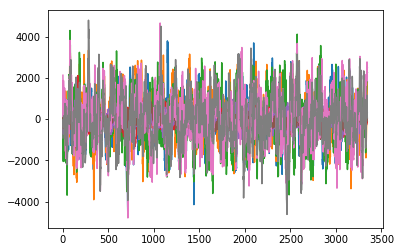

In [87]:
for i in range(8):
    plt.plot(test['data'][0]['d'][i])

In [88]:
r = requests.get('http://127.0.0.1:336/getdata', stream=True)

In [89]:
test = r.json()

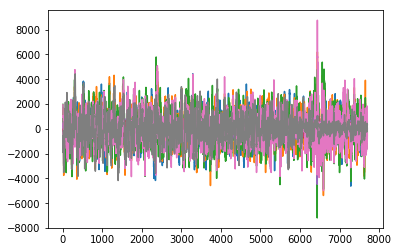

In [90]:
for i in range(8):
    plt.plot(test['data'][0]['d'][i])

In [300]:
r = requests.get('http://127.0.0.1:336/getdata', stream=True)
time.sleep(5)
test = r.json()

In [289]:
test = r.json()

In [303]:
recorded = mne.io.read_raw_edf('2019.06.21-16.18.54.357.edf', preload=True)

Extracting EDF parameters from C:\Users\Mirfarid\Documents\neuro\2019.06.21-16.18.54.357.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 749  =      0.000 ...     5.992 secs...


In [316]:
recorded._data.shape

(8, 750)

In [306]:
recorded._data.shape[1]/5.992

125.16688918558077

In [307]:
r = requests.get('http://127.0.0.1:336/getdata', stream=True)
time.sleep(5.992)
test = r.json()

In [308]:
test = np.array(test['data'][0]['d'])

In [317]:
test.shape

(8, 1404)

In [310]:
test.shape[1] / (recorded._data.shape[1]/5.992)

11.217024

In [311]:
recorded2 = mne.io.read_raw_edf('2019.06.21-16.26.13.048.edf', preload=True)

Extracting EDF parameters from C:\Users\Mirfarid\Documents\neuro\2019.06.21-16.26.13.048.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1374  =      0.000 ...    10.992 secs...


In [318]:
recorded2._data.shape

(8, 1375)

In [312]:
recorded2._data.shape[1]/10.992

125.09097525473071

In [313]:
r = requests.get('http://127.0.0.1:336/getdata', stream=True)
time.sleep(10.992)
test2 = r.json()

In [314]:
test2 = np.array(test2['data'][0]['d'])

In [333]:
test2.shape

(8, 11388)

In [326]:
test2.shape[1] / (recorded2._data.shape[1]/10.992)

91.03774254545455

In [335]:
start = 0
stop = 0
intervals = []
start = time.time()
r = requests.get('http://127.0.0.1:336/getdata', stream=True)
stop = time.time()
intervals.append(stop-start)
start = time.time()
time.sleep(20)
stop = time.time()
intervals.append(stop-start)
start = time.time()
test3 = r.json()
stop = time.time()
intervals.append(stop-start)

In [340]:
intervals = np.array(intervals)
intervals.sum()

20.077474355697632

In [342]:
start = time.time()
r = requests.get('http://127.0.0.1:336/getdata', stream=True)
time.sleep(20)
test3 = r.json()
stop = time.time()
stop-start

20.63744020462036

In [331]:
test3 = np.array(test3['data'][0]['d'])

In [322]:
test3.shape

(8, 8463)

In [325]:
test3.shape

(8, 7215)

In [329]:
test3.shape

(8, 3621)

In [332]:
test3.shape

(8, 12153)

In [343]:
import cProfile

In [349]:
cProfile.run("r = requests.get('http://127.0.0.1:336/getdata', stream=True)")

         3597 function calls (3596 primitive calls) in 0.015 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
        1    0.000    0.000    0.015    0.015 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 <string>:1(__new__)
        2    0.000    0.000    0.000    0.000 __init__.py:1361(debug)
        2    0.000    0.000    0.000    0.000 __init__.py:1619(isEnabledFor)
        1    0.000    0.000    0.000    0.000 _collections.py:136(__init__)
        7    0.000    0.000    0.000    0.000 _collections.py:151(__getitem__)
        5    0.000    0.000    0.000    0.000 _collections.py:181(__iter__)
        4    0.000    0.000    0.000    0.000 _collections.py:209(add)
        1    0.000    0.000    0.000    0.000 _collections.py:225(extend)
        2    0.000    0.000    0.000    0.000 _collections.py:44(__init__

        1    0.000    0.000    0.000    0.000 {method 'sendall' of '_socket.socket' objects}
        4    0.000    0.000    0.000    0.000 {method 'setdefault' of 'collections.OrderedDict' objects}
        5    0.000    0.000    0.000    0.000 {method 'setdefault' of 'dict' objects}
        1    0.000    0.000    0.000    0.000 {method 'setsockopt' of '_socket.socket' objects}
        2    0.000    0.000    0.000    0.000 {method 'settimeout' of '_socket.socket' objects}
        1    0.000    0.000    0.000    0.000 {method 'sort' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'split' of 'bytes' objects}
       16    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
       18    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}
        7    0.000    0.000    0.000    0.000 {method 'strip' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'truncate' of '_io.StringIO' objects}
        2    0.000    0.0

In [353]:
cProfile.run("time.sleep(2)")

         4 function calls in 2.006 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.006    2.006 <string>:1(<module>)
        1    0.000    0.000    2.006    2.006 {built-in method builtins.exec}
        1    2.006    2.006    2.006    2.006 {built-in method time.sleep}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [360]:
def func():
    r = requests.get('http://127.0.0.1:336/getdata', stream=True)
    time.sleep(3)
    test3 = r.json()

In [364]:
cProfile.run("func()")

         4015 function calls (4014 primitive calls) in 3.034 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
        1    0.000    0.000    3.034    3.034 <ipython-input-360-71df044aefea>:1(func)
        1    0.000    0.000    3.034    3.034 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 <string>:1(__new__)
        2    0.000    0.000    0.000    0.000 __init__.py:1361(debug)
        2    0.000    0.000    0.000    0.000 __init__.py:1619(isEnabledFor)
        1    0.000    0.000    0.011    0.011 __init__.py:299(loads)
        1    0.000    0.000    0.000    0.000 _collections.py:136(__init__)
       19    0.000    0.000    0.000    0.000 _collections.py:151(__getitem__)
        5    0.000    0.000    0.000    0.000 _collections.py:181(__iter__)
        4    0.000    0.000    0.000    0.000 _collections.py:

        1    0.000    0.000    0.000    0.000 {built-in method _thread.allocate_lock}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.all}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.any}
        1    0.000    0.000    3.034    3.034 {built-in method builtins.exec}
       21    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
       29    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
      384    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.iter}
   100/99    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.max}
       26    0.000    0.000    0.000    0.000 {built-in method builtins.next}
        6    0.000    0.000    0.000    0.000 {built-in method builtins.sorted}
        2    0.000    0.000    0.000    0.000 

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [8]:
r = requests.get('http://127.0.0.1:336/getdata', stream=True)
time.sleep(10)
r.json();

In [21]:
runs = []

for i in range(10):
    r = requests.get('http://127.0.0.1:336/getdata', stream=True)
    time.sleep(3)
#     if i==0:
#         time.sleep(10)
#         continue
#     if i == 1:
#         continue

    runs.append(r.json())

In [22]:
data = []
for i in range(len(runs)):
    data.append(np.array(runs[i]['data'][0]['d']))

In [23]:
shapes = []
for i in range(len(data)):
    shapes.append(data[i].shape[1])

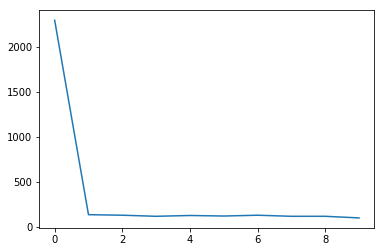

In [24]:
plt.plot(shapes)

In [25]:
shapes

[2298, 138, 132, 120, 129, 123, 132, 120, 120, 102]

In [14]:
channel1 = np.concatenate((data[0][0,:], data[1][0,:]), axis=0)

In [47]:
channel1 = np.concatenate((data[0][0,:], data[1][0,:]), axis=0)


array([  133.14164734,  1143.19250488,  -677.14294434,   489.71936035,
        3408.06518555,  -223.13592529,    62.8770752 , -1512.16027832])

In [52]:
channels = []
for ch in range(8):
    channels.append(np.concatenate([data[i][ch,:] for i in range(20)]), axis = 0)

TypeError: append() takes no keyword arguments

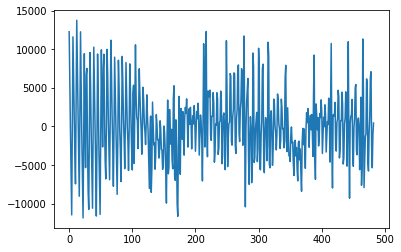

In [15]:
plt.plot(channel1)

In [373]:
runs = []
for i in range(10):
    r = requests.get('http://127.0.0.1:336/getdata', stream=True)
    time.sleep(4)
    runs.append(r.json())

In [374]:
data = []
for i in range(len(runs)):
    data.append(np.array(runs[i]['data'][0]['d']))

In [375]:
shapes = []
for i in range(len(data)):
    shapes.append(data[i].shape[1])

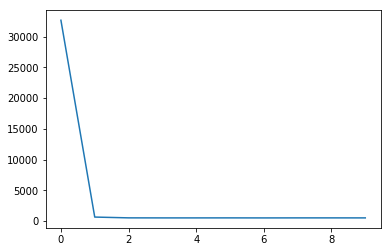

In [376]:
plt.plot(shapes)

In [377]:
shapes

[32670, 639, 510, 504, 504, 507, 501, 507, 507, 504]

In [301]:
test = np.array(test['data'][0]['d'])

In [302]:
test.shape

(8, 1980)

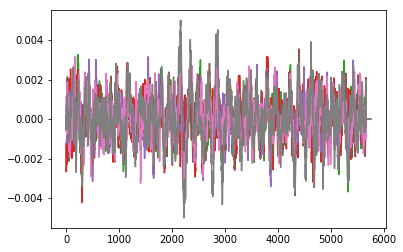

In [271]:
for i in range(8):
    plt.plot(recorded._data[i])

In [294]:
for i in range(8):
    plt.plot(test[i])

KeyError: 0

In [273]:
recorded = mne.io.read_raw_edf('2019.06.21-15.29.26.734.edf', preload=True)

Extracting EDF parameters from C:\Users\Mirfarid\Documents\neuro\2019.06.21-15.29.26.734.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1749  =      0.000 ...    13.992 secs...


In [275]:
recorded._data.shape

(8, 1750)

In [276]:
recorded.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | O1, P3, C3, F3, F4, C4, P4, O2
    chs : list | 8 items (EEG: 8)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 62.5 Hz
    meas_date : tuple | 2019-06-21 15:29:27 GMT
    nchan : int | 8
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 125.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>

In [378]:
import matplotlib.pyplot as plt

In [430]:
r = requests.get('http://127.0.0.1:336/getdata', stream=True)

In [431]:
if r:
    print(1)

1


In [432]:
json = r.json()

In [435]:
json.keys()

dict_keys(['data', 'result', 'samples'])

In [446]:
"data" in r.text

True

In [40]:
import time

In [66]:
#r = requests.get('http://127.0.0.1:336/getdata', stream=True)
r = requests.get('http://127.0.0.1:336/getdata')

In [61]:
test = r.json()
data = np.array(test['data'][0]['d'])
std_data = np.std(data,1)
max_std = max(std_data)

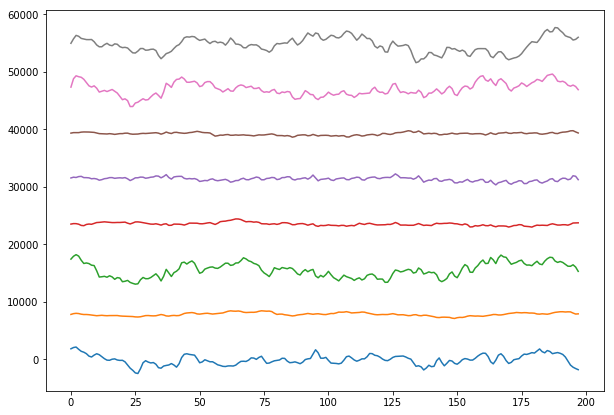

In [62]:
plt.figure(figsize=(10,7))
for i in range(8):
    plt.plot(test['data'][0]['d'][i]+i*6*max_std)

In [72]:
data.shape[1]

210

expected sampling rate:  125
sampling rate:  50.0
expected sampling rate:  125
sampling rate:  47.0
expected sampling rate:  125
sampling rate:  49.0
expected sampling rate:  125
sampling rate:  49.0
expected sampling rate:  125
sampling rate:  50.0
expected sampling rate:  125
sampling rate:  47.0
expected sampling rate:  125
sampling rate:  51.0
expected sampling rate:  125
sampling rate:  50.0
expected sampling rate:  125
sampling rate:  50.0
expected sampling rate:  125
sampling rate:  48.0


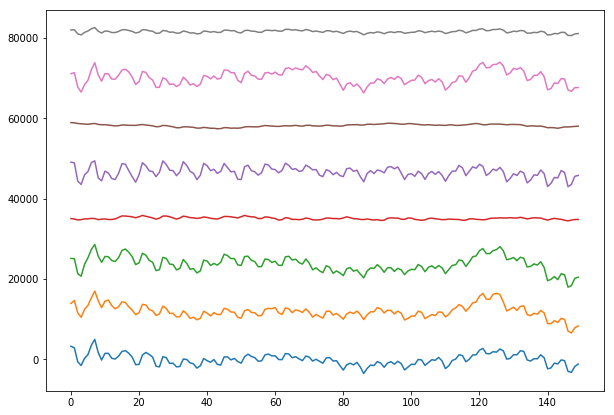

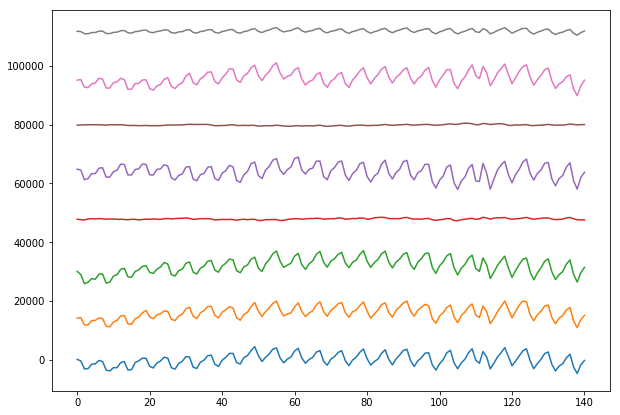

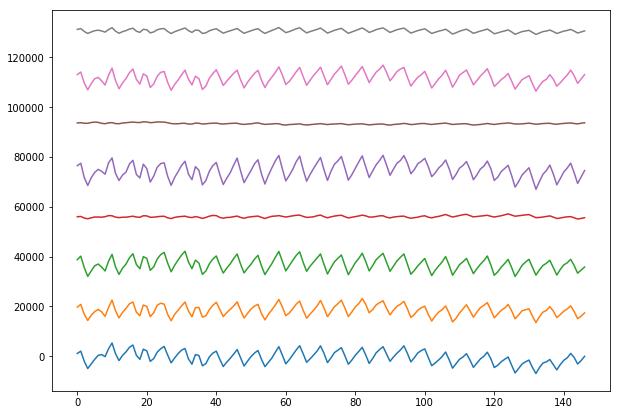

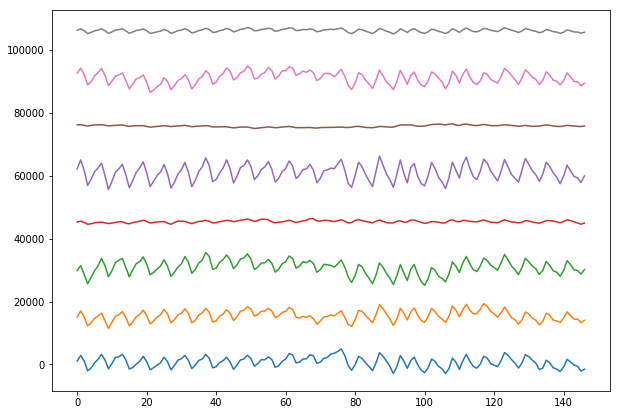

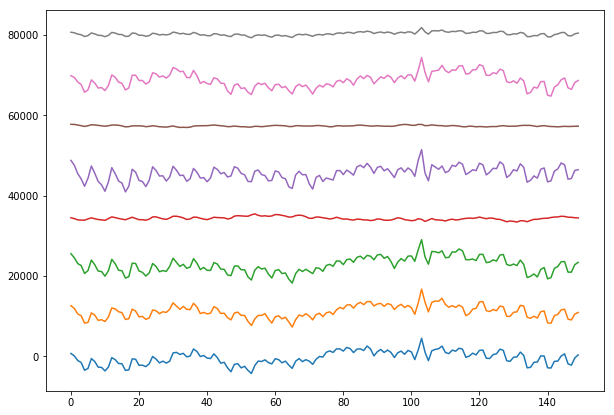

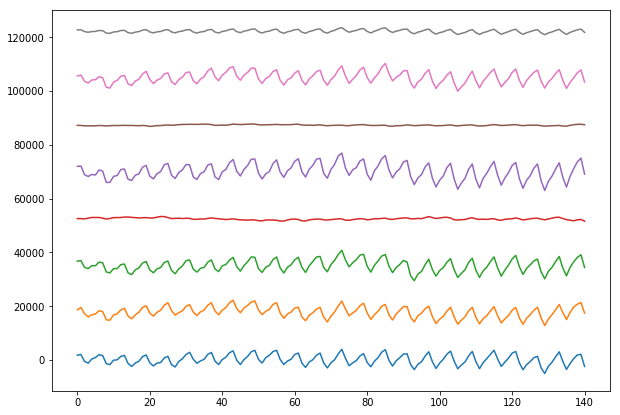

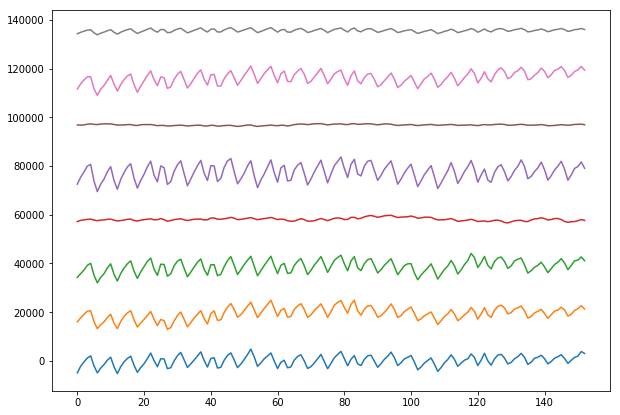

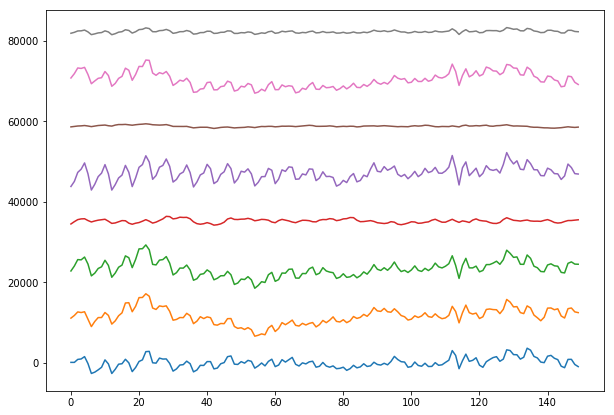

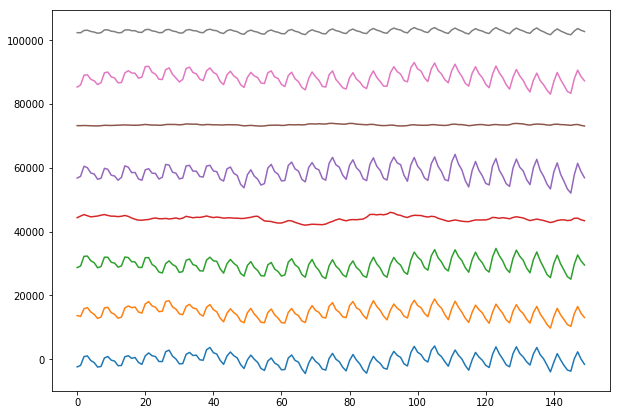

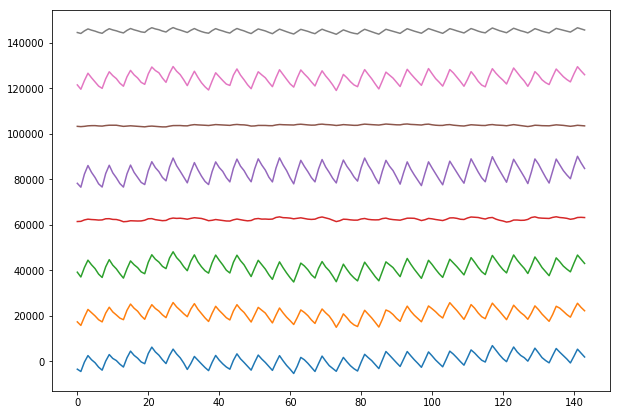

In [74]:
# record data for batch_recording_time seconds, calculate the sampling rate for each run
n_channels = 8
n_runs = 10
batch_recording_time = 3 # seconds
r = requests.get('http://127.0.0.1:336/getdata', stream=True)

for _ in range(n_runs):
    r = requests.get("http://127.0.0.1:336/getinfo")
    print('expected sampling rate: ', r.json()['frequency'])

    time.sleep(batch_recording_time)
    r = requests.get('http://127.0.0.1:336/getdata', stream=True)
    
    test = r.json()
    data = np.array(test['data'][0]['d'])
    print("sampling rate: ", data.shape[1]/batch_recording_time)
    std_data = np.std(data,1)
    max_std = max(std_data)
    plt.figure(figsize=(10,7))
    for i in range(n_channels):
        plt.plot(test['data'][0]['d'][i]+i*6*max_std)